# EXERCISE 07: Montecarlo simulation of LJ system

## 07.1
**In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.**

I implemented the tail corrections in the *initialize_properties()* function:

**potential energy correction:**
```c++
        _vtail = A/double(9*pow(_r_cut,9))-A/double(3*pow(_r_cut,3)); 
        

**pressure correction**
```c++
        _ptail = (32.*M_PI*_rho)*(1./double(9*pow(_r_cut,9))-1./double(6*pow(_r_cut,3))); 
       

## 07.2
### Exercise 07.2

<b>Use the NSL simulator code to <span style="color:red">print out **instantaneous** values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo $(N,V,T)$ and Molecular Dynamics $(N,V,E)$ simulations</span> of $M=5\times 10^5$ MC steps or MD time steps in the following thermodynamic conditions:<b>
- **liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r^\star_c = 2.5$, for MD $dt^\star=0.001$)**
1. <b>Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. <b>Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

#### MC ACCEPTANCE
In order to obtain correct results with the MC method, my first step was to determine the optimal step_length to obtain an acceotance of 50%. To do so I performed 10 simple simulations in which I let the system evolve for 5000 steps and determined the acceptance rate.

Text(0.5, 1.0, 'MC acceptance rate')

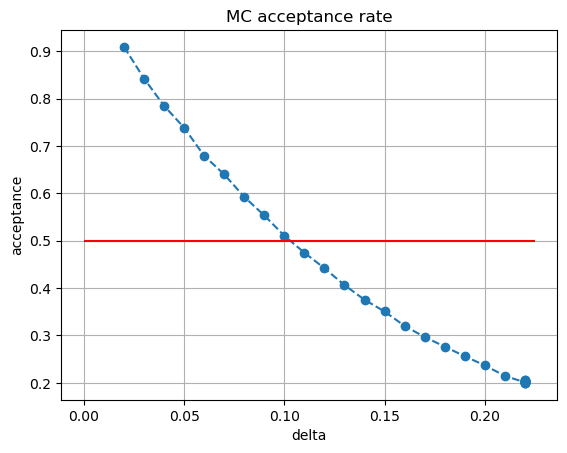

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/acceptance.csv"
df =pd.read_csv(file,sep ='\t')

plt.plot(df['DELTA'],df['ACCEPTANCE'],marker ='o', linestyle='dashed')
plt.hlines(0.5,0.,0.225, color= 'red')
plt.grid()
plt.xlabel('delta')
plt.ylabel('acceptance')
plt.title('MC acceptance rate')


Therefore I chose dt=0.1

#### EQUILIBRATION 
To equilibrate the system, I tried different starting temperatures and let the system evolve for 3000 steps. I determined that stOptimal starting temperature is 1.97,since the temperature becomes well stabilized around the desired value. From the following plot I also deduced that 1500 steps are sufficient to reach stability.

/tmp/ipykernel_34737/839994207.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


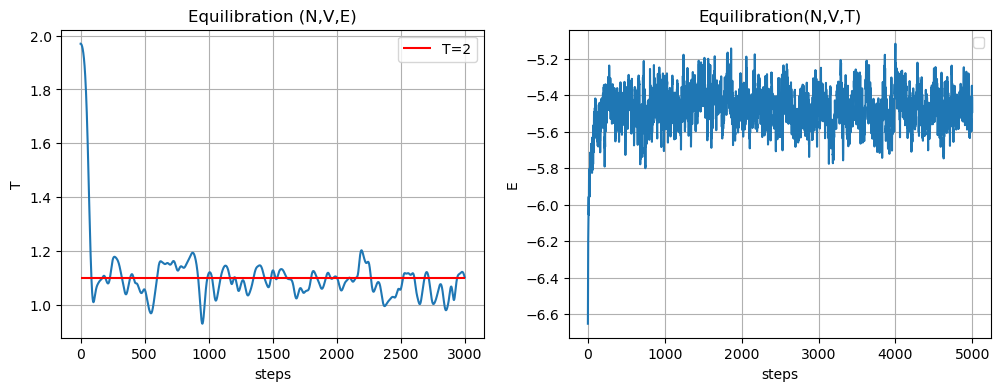

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/Equilibration_MD.csv"
df1 = pd.read_csv(file,sep ="\t")
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/Equilibration_MC.csv"
df2 = pd.read_csv(file,sep ="\t")
Neq_steps=len(df1['Step'])

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(df1['Step'],df1['Temp'])
ax[0].hlines(1.1,0,Neq_steps,color='r',label = 'T=2')
ax[0].set_xlabel('steps')
ax[0].set_ylabel('T')
ax[0].legend()
ax[0].set_title(f'Equilibration (N,V,E)')
ax[0].grid()

ax[1].plot(df2['Step'],df2['Energy'])
ax[1].set_xlabel('steps')
ax[1].set_ylabel('E')
ax[1].legend()
ax[1].set_title(f'Equilibration(N,V,T)')
ax[1].grid()
plt.show()

#### U/N AUTOCORRELATION

After the 1500 equilibration steps in which I don't make any measurements, I performed 500000 steps of MD and MC to obtain the instant values of $\frac{U}{N}$

In [ ]:
import pandas as pd
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/Potential_Energy.csv"
df pd.read_csv('

In [3]:
print(df1['T_AVE'][0]-df1['T_AVE'].tail(1))
print(df1['T_AVE'].tail(1))

9    0.00021
Name: T_AVE, dtype: float64
9    1.09224
Name: T_AVE, dtype: float64


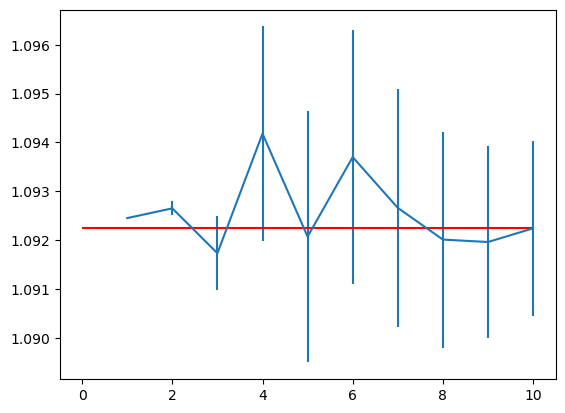

In [4]:
plt.errorbar(df1['BLOCK'],df1['T_AVE'],yerr=df1['ERROR'])
plt.hlines(df1['T_AVE'].tail(1),0,df1['BLOCK'].tail(1),color='red')
plt.show()

In [5]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy.csv"
df = pd.read_csv(file,sep ="\t")
df.head()


,BLOCK,ACTUAL_PE,PE_AVE,ERROR
0,1,-5.46073,-5.46073,0.000000
1,2,-5.46075,-5.46074,0.000008
2,3,-5.45667,-5.45938,0.001108
3,4,-5.47356,-5.46293,0.003180
4,5,-5.44684,-5.45971,0.003842


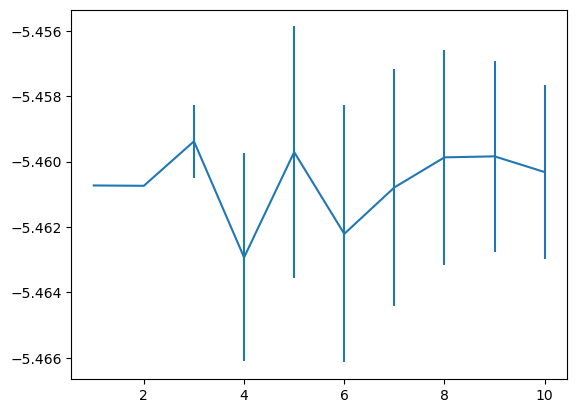

In [6]:
plt.errorbar(df['BLOCK'],df['PE_AVE'],yerr=df['ERROR'])

plt.show()

In [7]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/U_block_length.csv"
df2 = pd.read_csv(file,sep ="\t")
df2


,LENGTH,ERROR
0,3500,0.002665


In [8]:
BL = df2['LENGTH'][df2['ERROR']==df2['ERROR'].min()]
BL.tolist()
print('Optimal block length: ', BL)

Optimal block length:  0    3500
Name: LENGTH, dtype: int64


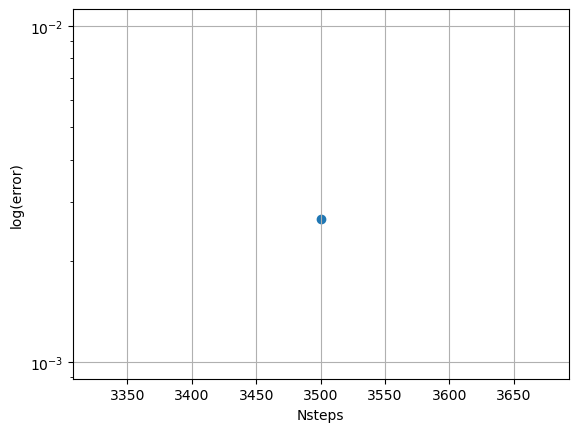

In [9]:
fig,ax = plt.subplots()
ax.scatter(df2['LENGTH'],df2['ERROR'])
ax.set_yscale('log')
plt.xlabel('Nsteps')
plt.ylabel('log(error)')
plt.grid()

In [30]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr.csv"
with open (file) as f:
    bin_size = f.readline()
    print(bin_size)

BIN SIZE	0.0256496



In [31]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr.csv"
df = pd.read_csv(file,sep ="\t", skiprows=1,skip_blank_lines = False)
df.head()

,BIN,DISTANCE,AVE_GOFR,ERROR
0,0.0,0.025650,0.0,0.0
1,1.0,0.051299,0.0,0.0
2,2.0,0.076949,0.0,0.0
3,3.0,0.102599,0.0,0.0
4,4.0,0.128248,0.0,0.0


In [32]:
T=1.1

nan_rows = df[df.isnull().all(axis=1)].index

# Add start/end points for slicing
split_points = [-1] + list(nan_rows) + [len(df)]

# Slice the DataFrame into blocks
histograms = []
for i in range(len(split_points) - 1):
    start = split_points[i] + 1
    end = split_points[i + 1]
    block = df.iloc[start:end].reset_index(drop=True)
    if not block.empty:
        histograms.append(block)

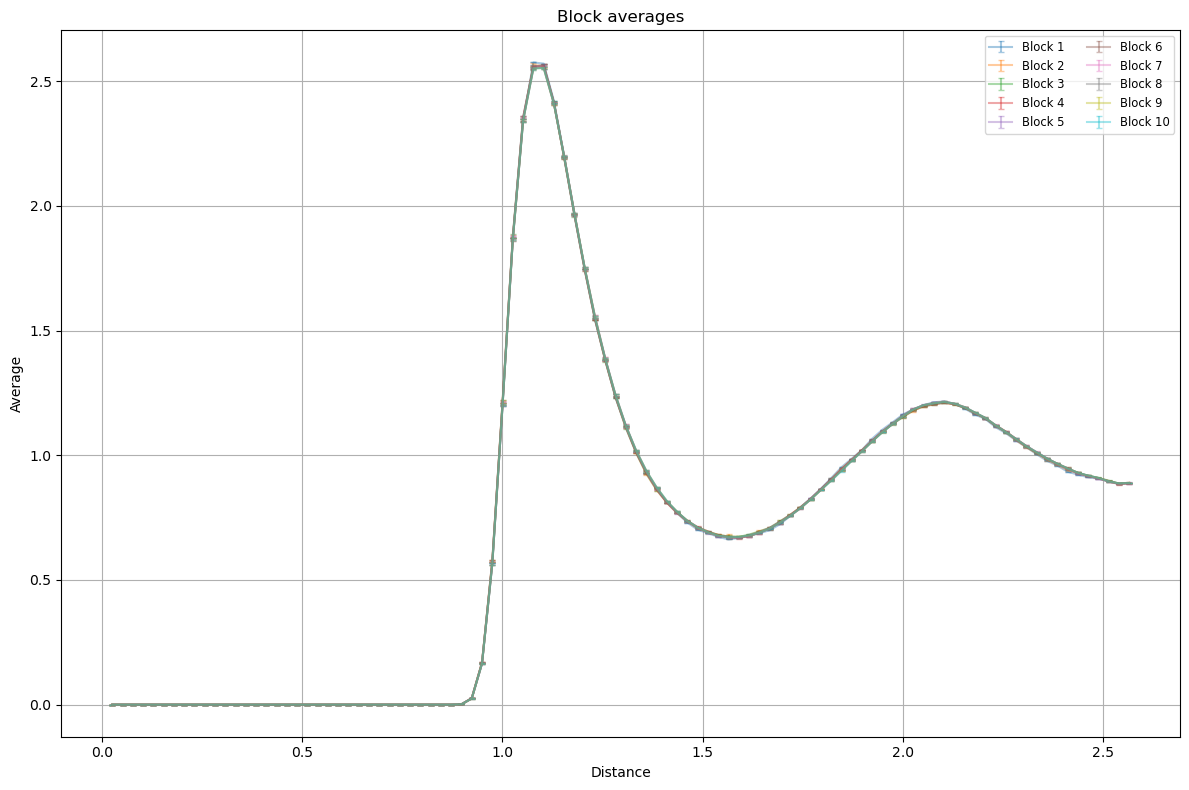

In [33]:
plt.figure(figsize=(12, 8))

for i, h in enumerate(histograms):
    plt.errorbar(
        h['DISTANCE'], h['AVE_GOFR'], yerr=h['ERROR'],
        fmt='-', capsize=2, alpha=0.4, label=f'Block {i+1}'
    )

plt.xlabel('Distance')
plt.ylabel('Average')
plt.title('Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

In [14]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr_blockave.csv"
with open (file) as f:
    bin_size = f.readline()
    print(bin_size)

BIN SIZE	0.0256496



In [15]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr_blockave.csv"
dfa = pd.read_csv(file,sep ="\t", skiprows=1,skip_blank_lines = False)
dfa.head()

,BIN,DISTANCE,AVE_GOFR
0,0.0,0.025650,0.0
1,1.0,0.051299,0.0
2,2.0,0.076949,0.0
3,3.0,0.102599,0.0
4,4.0,0.128248,0.0


In [16]:
T=1.1

nan_rows = dfa[dfa.isnull().all(axis=1)].index

# Add start/end points for slicing
split_points = [-1] + list(nan_rows) + [len(dfa)]

# Slice the DataFrame into blocks
histograms1 = []
for i in range(len(split_points) - 1):
    start = split_points[i] + 1
    end = split_points[i + 1]
    block = dfa.iloc[start:end].reset_index(drop=True)
    if not block.empty:
        histograms1.append(block)

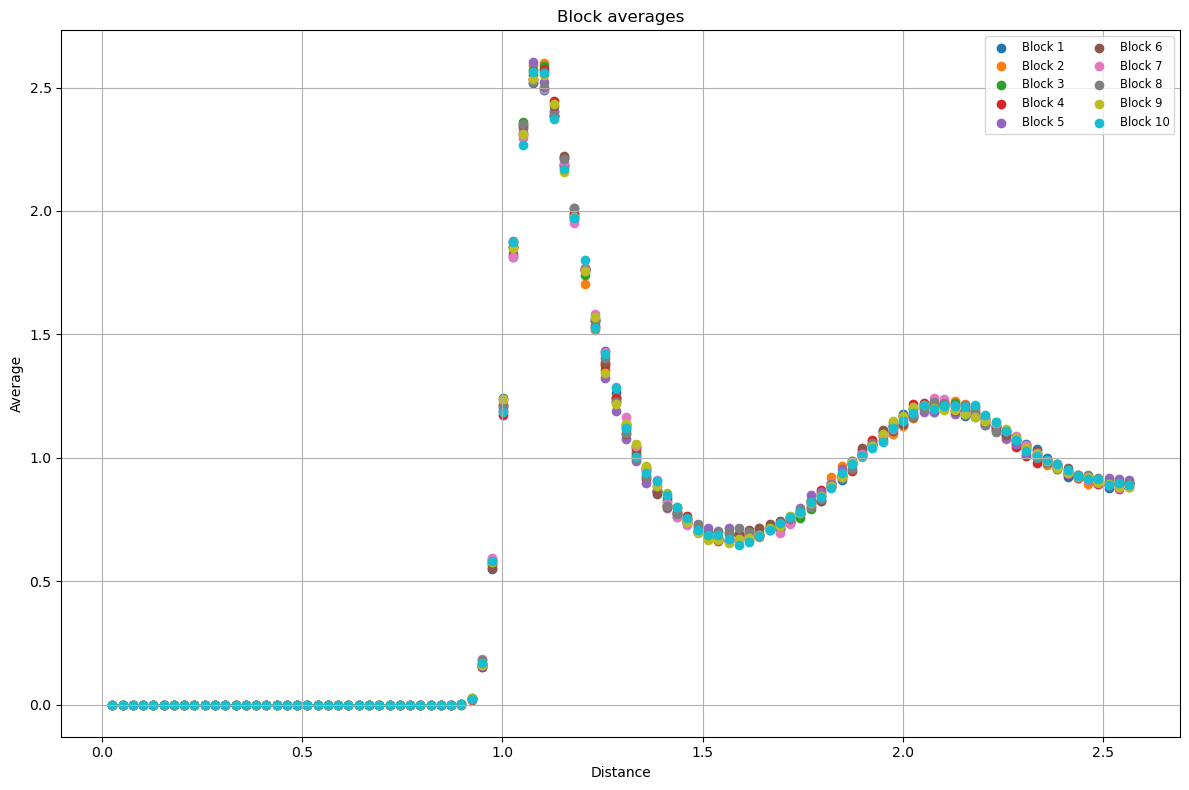

In [17]:
plt.figure(figsize=(12, 8))

for i, h in enumerate(histograms1):
    plt.scatter(
        h['DISTANCE'], h['AVE_GOFR'], label=f'Block {i+1}')

plt.xlabel('Distance')
plt.ylabel('Average')
plt.title('Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()